In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from sklearn.mixture import GaussianMixture
import pandas as pd

In [3]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

def EMGMM2(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.EMGMM_varconstraint(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

In [4]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

### KIR2DL3

In [4]:
KIR2DL3_data=B['KIR2DL3'].to_numpy()

X=KIR2DL3_data

em,t=EMGMM(X,[])
em2,t2=EMGMM2(X,[])

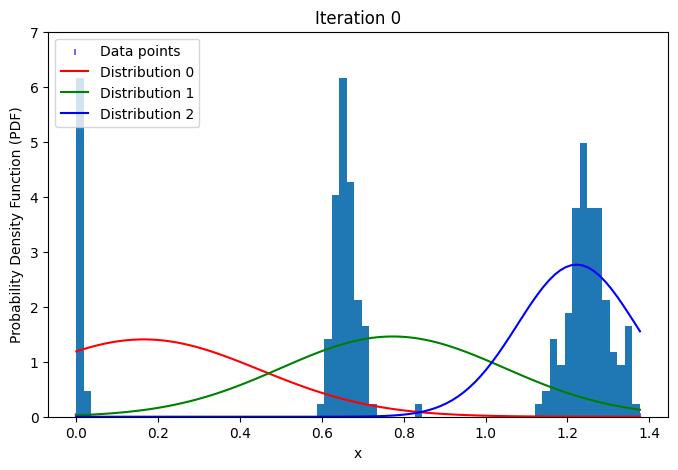

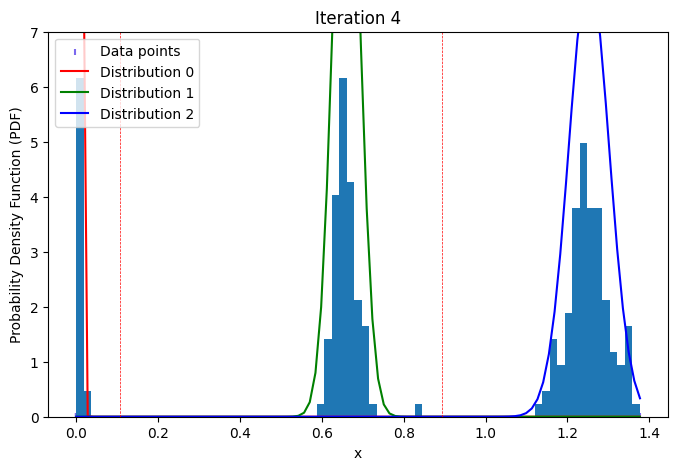

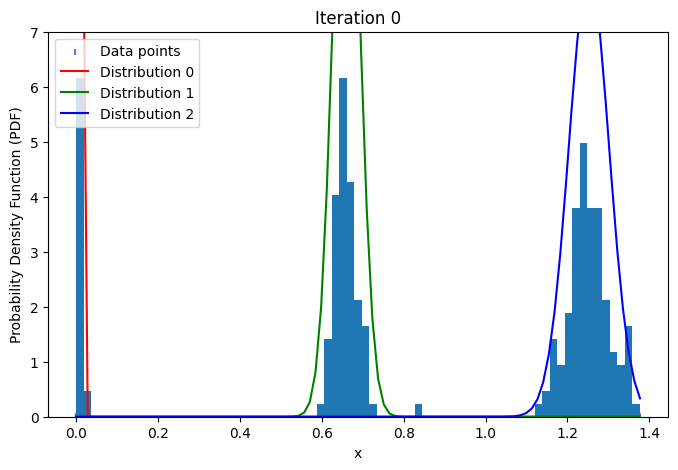

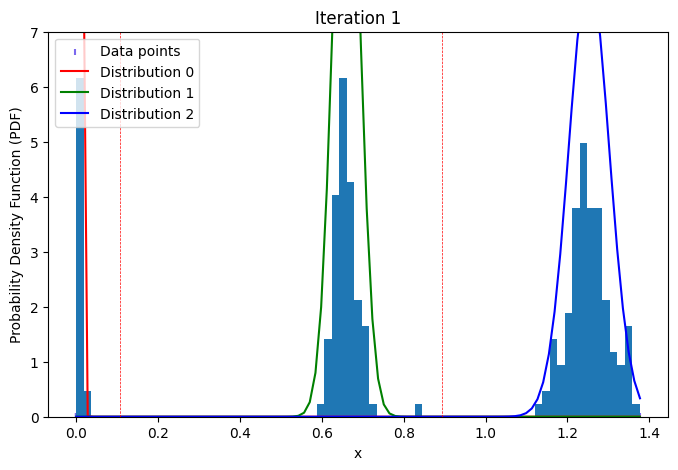

In [5]:
gauss.PlotGMM(X,em,10,t,7)
gauss.PlotGMM(X,em2,10,t2,7)

In [6]:
print('Without constraint:',em[-1],t)
print('With constraint:',em2[-1],t2)

Without constraint: [{'Mean': 0.0026031759405914555, 'Variance': 3.631934372436482e-05, 'Weight': 0.12173913043478433}, {'Mean': 0.6598742205296836, 'Variance': 0.0010415399600778716, 'Weight': 0.3739130434752886}, {'Mean': 1.2526026193664808, 'Variance': 0.002445207052663402, 'Weight': 0.504347826089927}] [0.10619147769492614, 0.894292360683069]
With constraint: [{'Mean': 0.002603175940582968, 'Variance': 3.6319343719344635e-05, 'Weight': 0.12173913043478261}, {'Mean': 0.6598742205284993, 'Variance': 0.001041539959875519, 'Weight': 0.3739130434727865}, {'Mean': 1.2526026193644157, 'Variance': 0.0024452070535100775, 'Weight': 0.5043478260924309}] [0.10619147769714204, 0.8942923606439792]


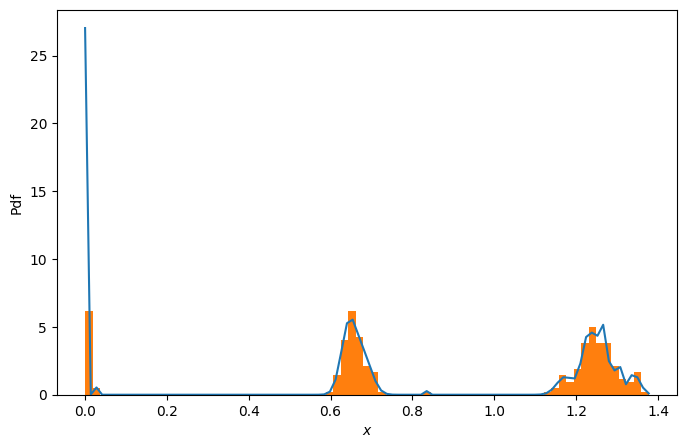

In [ ]:
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

# plt.plot(b,pdf1)
plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

### KIR2DP1

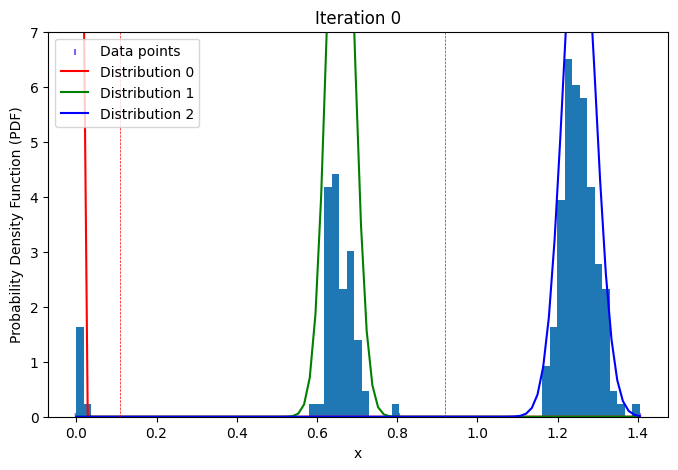

[{'Mean': 0.002518583472601108, 'Variance': 3.868808018124263e-05, 'Weight': 0.03478260869565218}, {'Mean': 0.658584905926609, 'Variance': 0.0010252717874594899, 'Weight': 0.3086956533878779}, {'Mean': 1.2533949031712883, 'Variance': 0.0016881418876619999, 'Weight': 0.65652173791647}] [0.10906686354171681, 0.9179859366802242]


In [7]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1,th=EMGMM2(KIR2DP1_data,[])

gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,th,7)

print(iter_data_KIR2DP1[-1],th)

In [ ]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1=EM(KIR2DP1_data,3,initial)

t=gauss.findThreshold2(KIR2DP1_data,3,iter_data_KIR2DP1)

gauss.PlotGMM(KIR2DP1_data,iter_data_KIR2DP1,10,t,7)

print(iter_data_KIR2DP1[-1])

In [ ]:
X=KIR2DP1_data.reshape(-1,1)

In [ ]:
X=X.reshape(-1,1)

N = np.arange(1, 5)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_)
print(gm.covariances_)
print(iter_data_KIR2DP1[-1])

[[1.2533949 ]
 [0.6585849 ]
 [0.00251858]]
[[[1.68914190e-03]]

 [[1.02627074e-03]]

 [[3.96880802e-05]]]
[{'Mean': 0.1062323123133622, 'Variance': 0.07004124680804678, 'Weight': 0.04016898675399033}, {'Mean': 0.6565057233511385, 'Variance': 0.0007246544450363808, 'Weight': 0.3033139515710647}, {'Mean': 1.2533969841889148, 'Variance': 0.001688154858287509, 'Weight': 0.6565210277534098}]


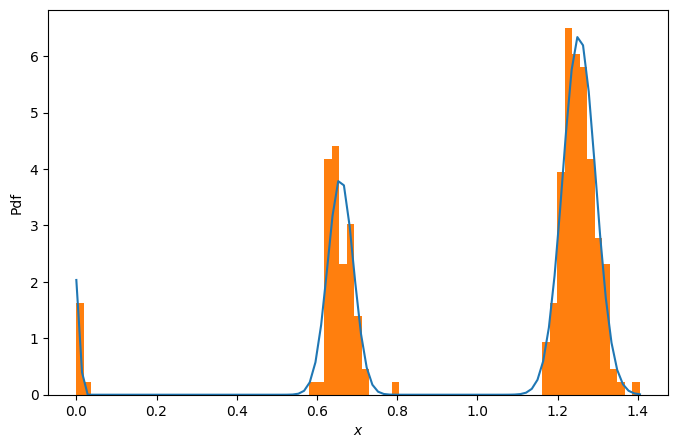

In [ ]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

### KIR3DL1

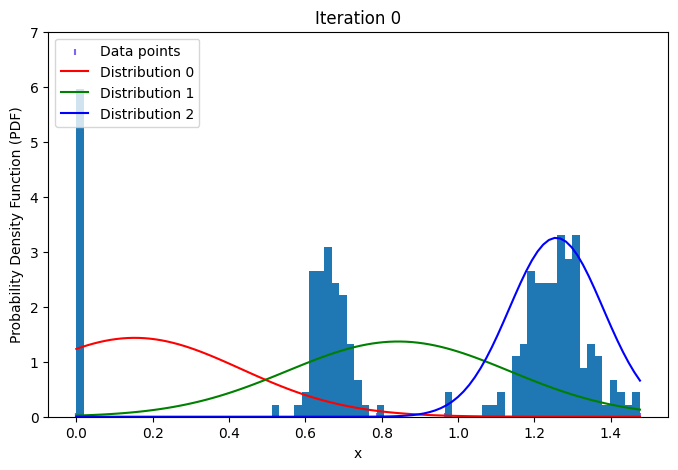

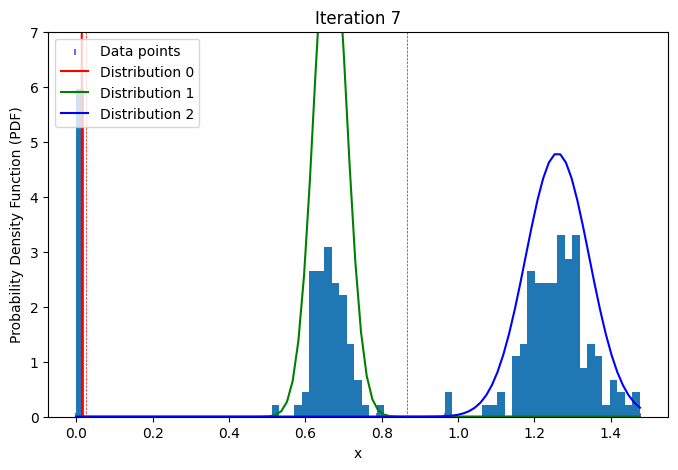

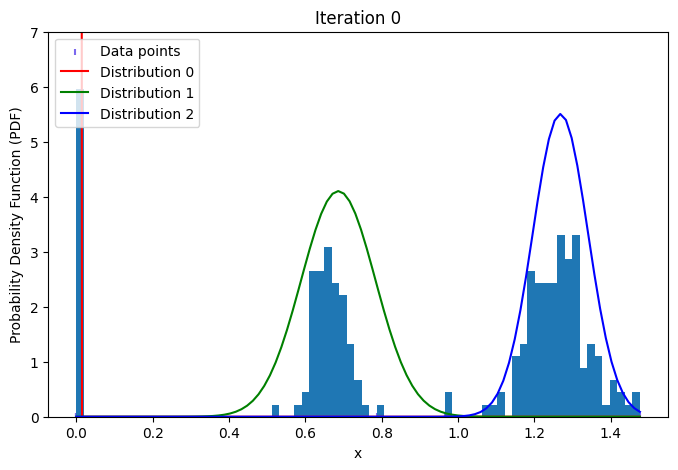

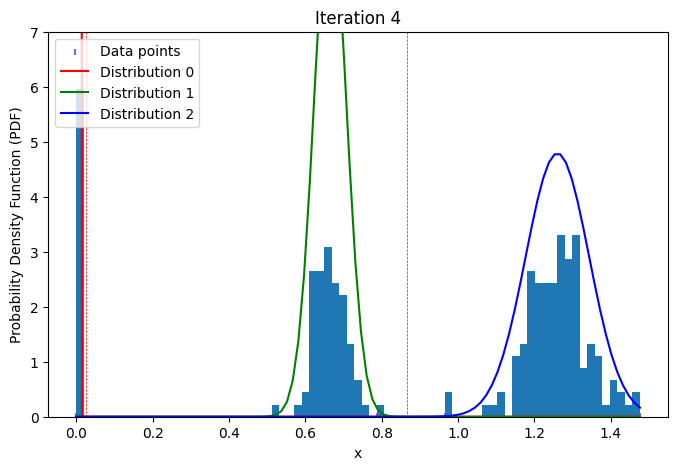

In [9]:
KIR3DL1_data=B['KIR3DL1'].to_numpy()

em,t=EMGMM(KIR3DL1_data,[])
em2,t2=EMGMM2(KIR3DL1_data,[])

gauss.PlotGMM(KIR3DL1_data,em,10,t,7)
gauss.PlotGMM(KIR3DL1_data,em2,10,t2,7)

In [10]:
print('Without constraint:',em[-1],t)
print('With constraint:',em2[-1],t2)

Without constraint: [{'Mean': 0.001608796751460074, 'Variance': 2.689379381031728e-06, 'Weight': 0.11739130434782609}, {'Mean': 0.6648761364597296, 'Variance': 0.0018053847813292564, 'Weight': 0.3217390989581064}, {'Mean': 1.2600990671879115, 'Variance': 0.006934427285030243, 'Weight': 0.5608695966940674}] [0.02649180055182432, 0.8666714906607422]
With constraint: [{'Mean': 0.001608796751460074, 'Variance': 2.689379381031728e-06, 'Weight': 0.11739130434782609}, {'Mean': 0.6648761364588862, 'Variance': 0.0018053847812361471, 'Weight': 0.3217390989559131}, {'Mean': 1.2600990671860677, 'Variance': 0.006934427285873001, 'Weight': 0.5608695966962608}] [0.02649180055239727, 0.866671490648511]


### KIR2DS3

In [23]:
KIR2DS3_data=B["KIR2DS3"].to_numpy()

In [12]:
gauss.BIC_gmm(KIR2DS3_data)

3

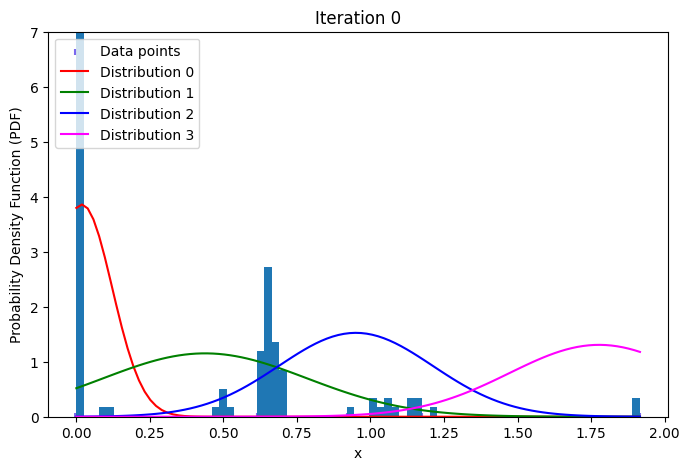

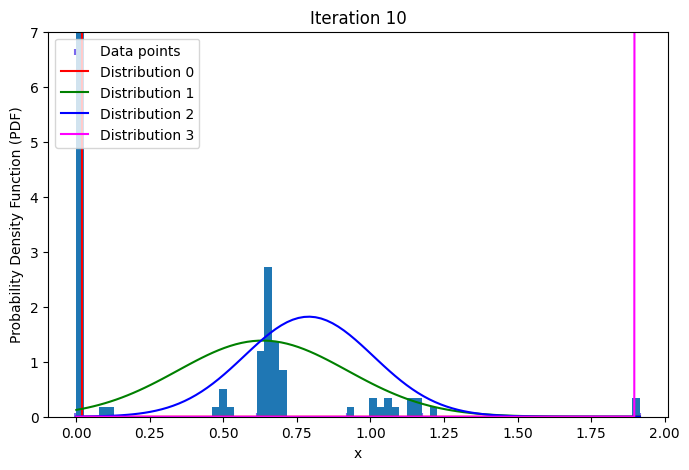

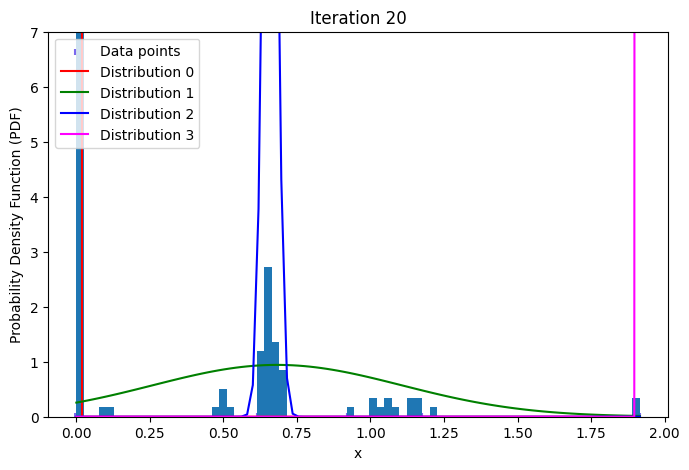

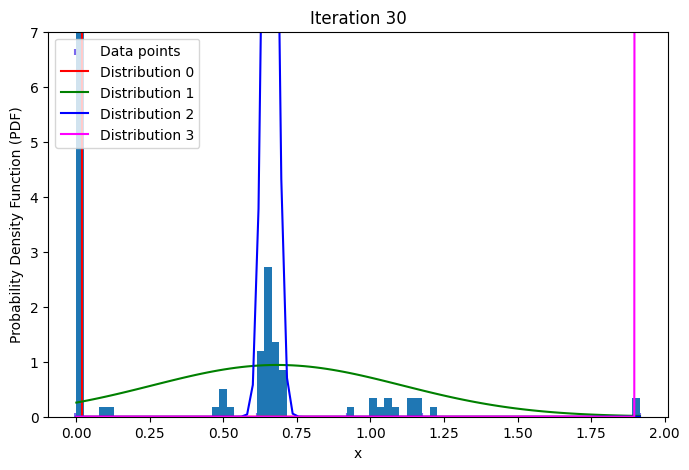

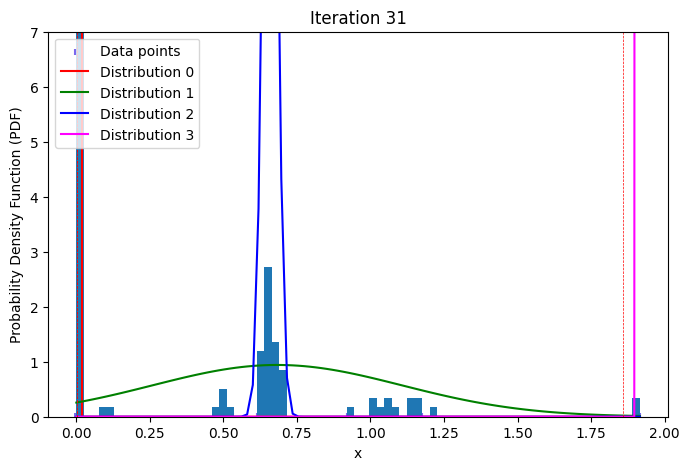

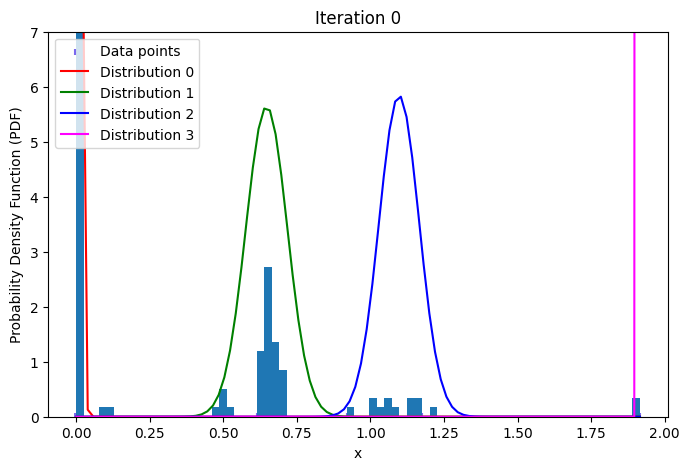

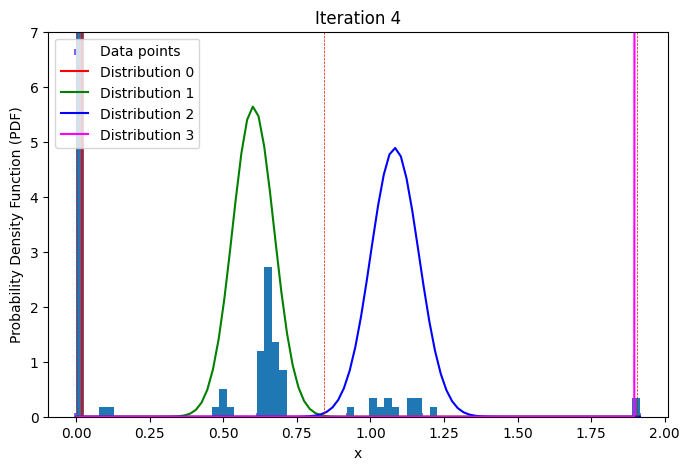

In [34]:
em=gauss.GaussianEM(KIR2DS3_data,4,[])
t=gauss.findThreshold2(KIR2DS3_data,4,em)
em2=gauss.EMGMM_varconstraint(KIR2DS3_data,4, [])
t2=gauss.findThreshold2(KIR2DS3_data,4,em2)

gauss.PlotGMM(KIR2DS3_data,em,10,t,7)
gauss.PlotGMM(KIR2DS3_data,em2,10,t2,7)

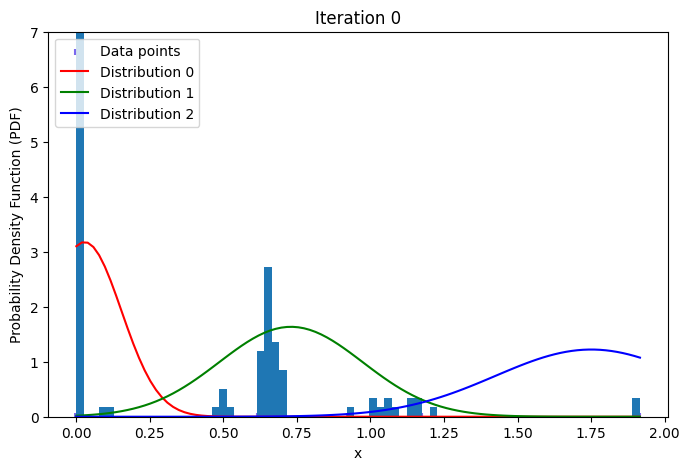

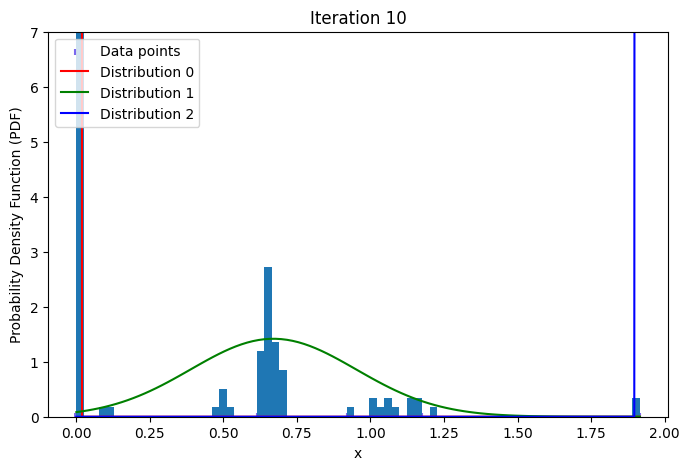

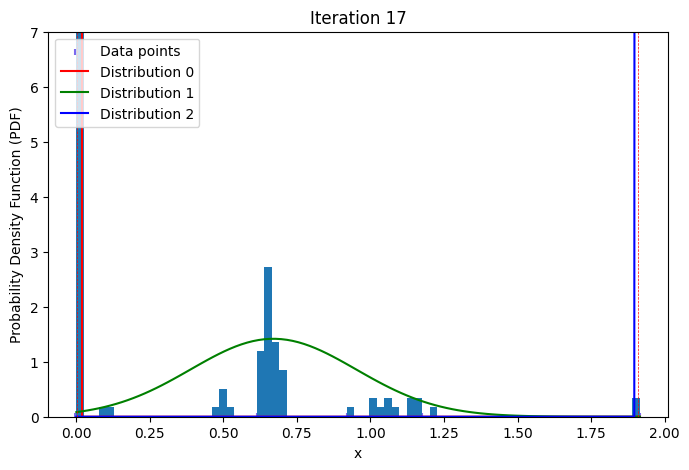

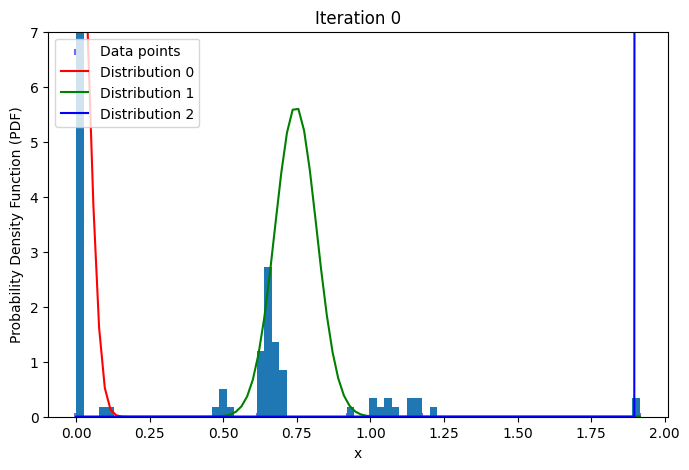

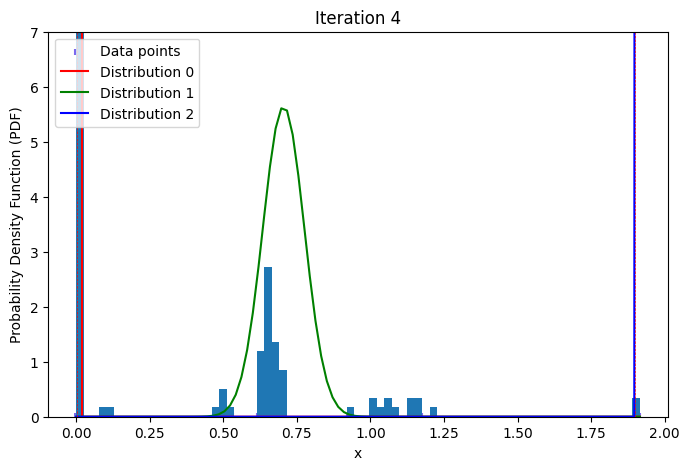

In [15]:

em,t=EMGMM(KIR2DS3_data,[])
em2,t2=EMGMM2(KIR2DS3_data,[])

gauss.PlotGMM(KIR2DS3_data,em,10,t,7)
gauss.PlotGMM(KIR2DS3_data,em2,10,t2,7)

In [27]:
print(t,t2)

[0.0012009363980548082, 1.0177096342016705, 1.9025392450569256] [0.0024133206000476605, 0.867123805078503, 1.9046713408050215]


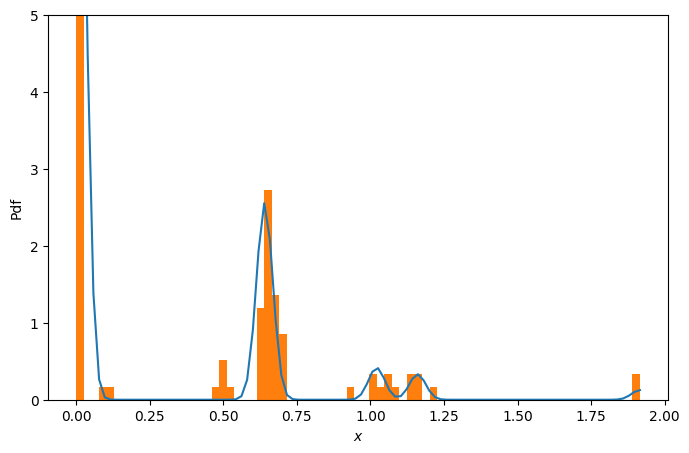

In [15]:
X=KIR2DS3_data.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 6)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i],covariance_type='tied').fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
plt.ylim(0,5)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [21]:
print(M_best_BIC.means_)
print(M_best_BIC.covariances_)

[[1.48877488e-03]
 [6.40275776e-01]
 [1.16006729e+00]
 [1.91535409e+00]
 [1.02094739e+00]]
[[0.00077399]]
